In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('E:\\heart_disease_uci.csv', encoding='latin1',delimiter=',')
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [13]:
df.shape

(920, 16)

In [14]:
df.describe(include=object)

sex    dataset            cp    fbs restecg  exang slope    thal
count    920        920           920    830     918    865   611     434
unique     2          4             4      2       3      2     3       3
top     Male  Cleveland  asymptomatic  False  normal  False  flat  normal
freq     726        304           496    692     551    528   345     196

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [88]:
df=df.replace('?', np.nan)
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca            0
thal        486
num           0
dtype: int64


In [16]:
df.hist(column='chol')

array([[<Axes: title={'center': 'chol'}>]], dtype=object)

In [17]:
df.hist(column='chol', bins=50)

array([[<Axes: title={'center': 'chol'}>]], dtype=object)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3852\1709164173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol)


<Axes: xlabel='chol', ylabel='Density'>

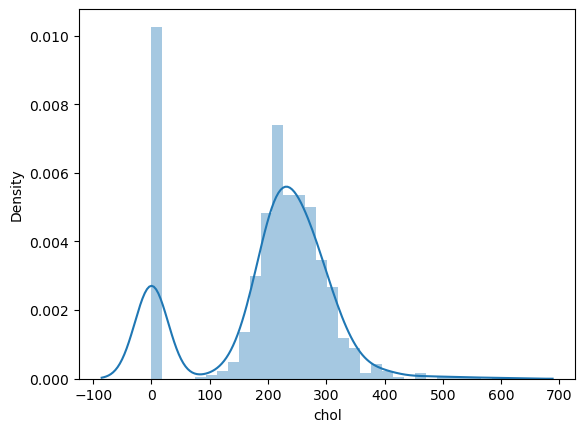

In [18]:
sns.distplot(df.chol)

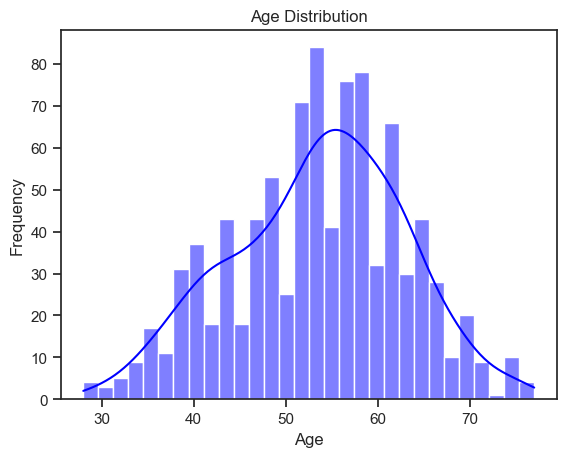

In [92]:
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

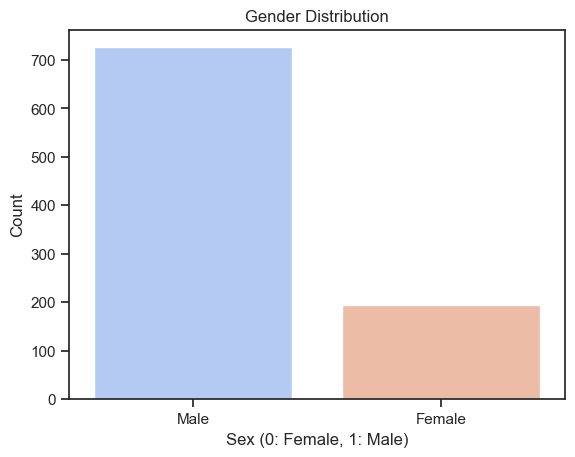

In [93]:
sns.countplot(x='sex', data=data, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

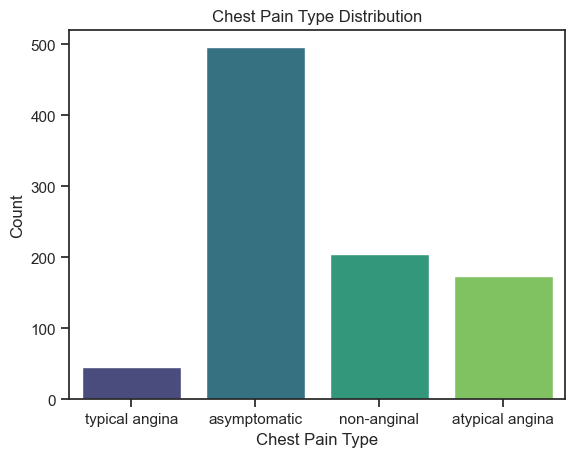

In [94]:
sns.countplot(x='cp', data=data, palette='viridis')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3852\2959341016.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



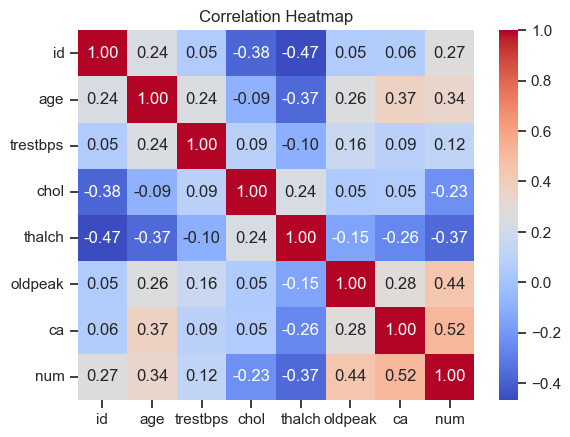

In [96]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.cp.unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [20]:
cp_count_table = pd.crosstab(index=df['cp'],columns='count')
cp_count_table

col_0            count
cp                    
asymptomatic       496
atypical angina    174
non-anginal        204
typical angina      46

<Axes: xlabel='cp'>

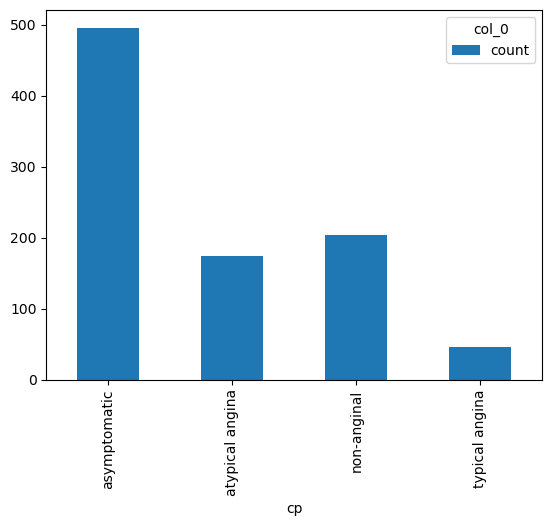

In [21]:
cp_count_table.plot(kind='bar')

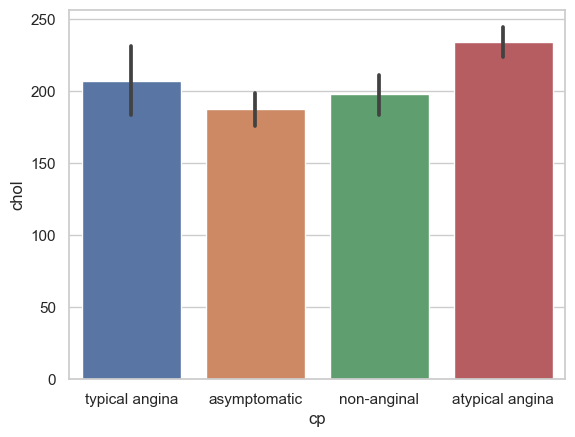

In [25]:
ax = sns.barplot(x="cp", y="chol",  data=df)

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_data = data[['age', 'trestbps', 'chol', 'thalch']]
sns.clustermap(selected_data.corr(), annot=True, cmap='viridis')
plt.title("Cluster Map of Feature Correlations")
plt.show()

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3852\2790321202.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



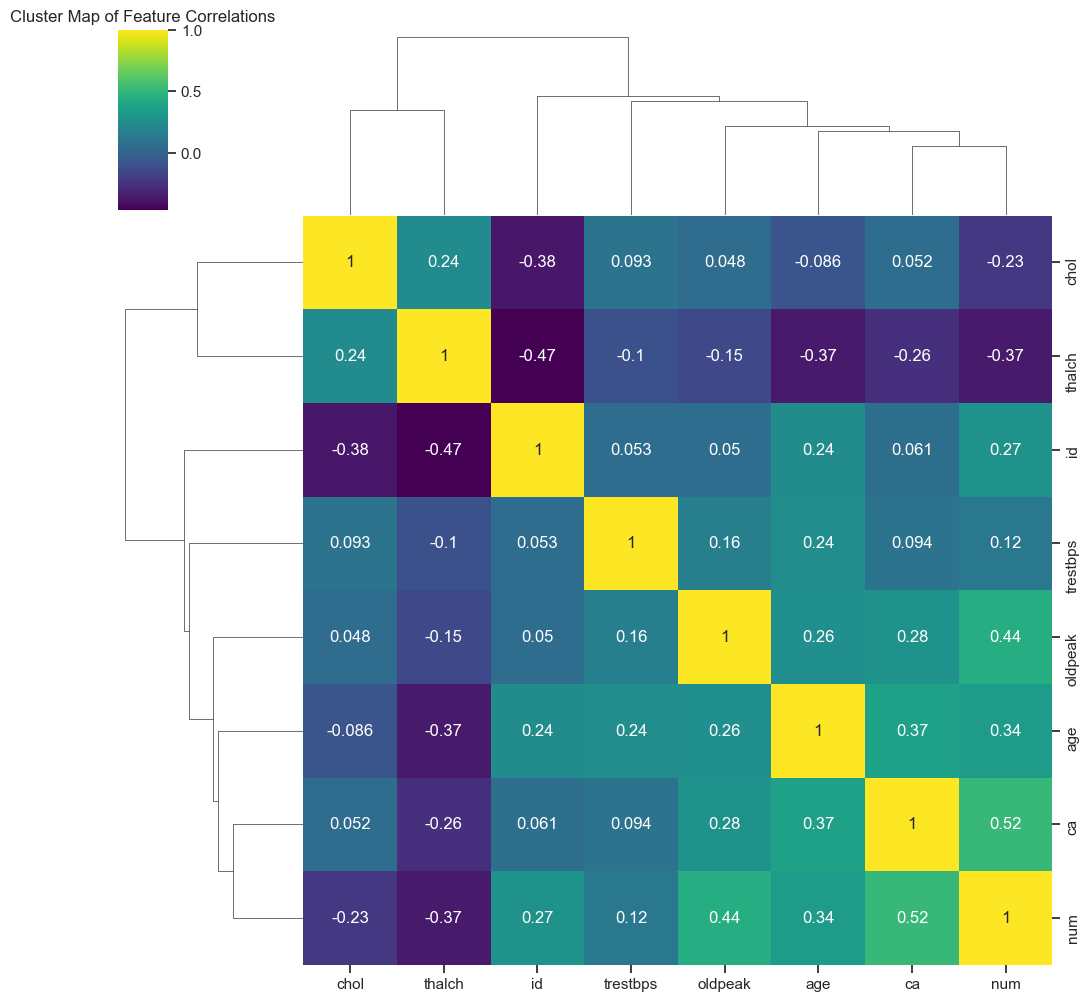

In [112]:
sns.clustermap(data.corr(), annot=True, cmap='viridis')
plt.title("Cluster Map of Feature Correlations")
plt.show()

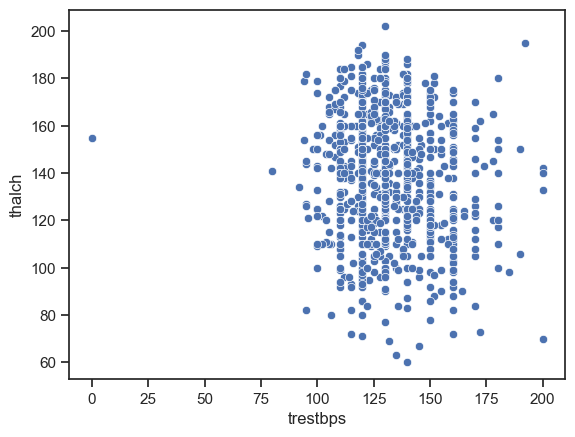

In [34]:
ax = sns.scatterplot(x="trestbps", y="thalch", data=df)

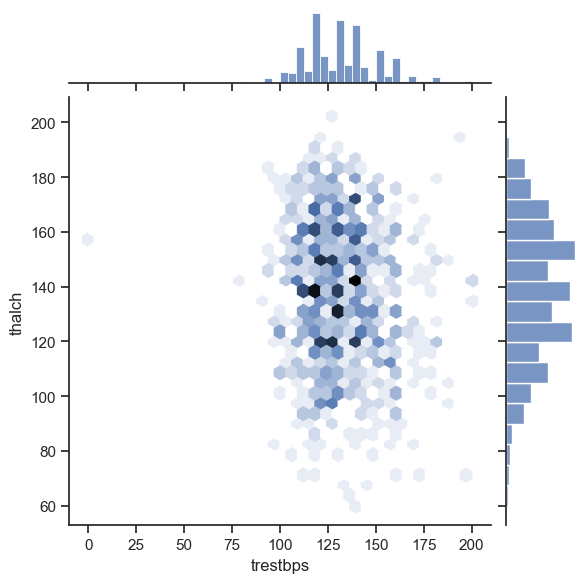

In [36]:
sns.set(style="ticks")
sns.jointplot(x="trestbps", y="thalch", data=df, kind="hex")

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3852\4239777980.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="trestbps", y="thalch", data=df, shade=True)


<Axes: xlabel='trestbps', ylabel='thalch'>

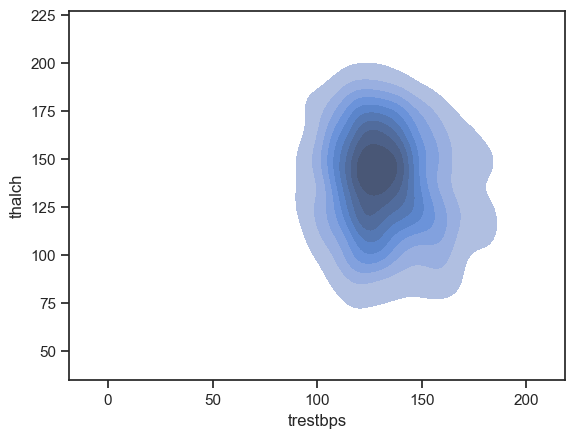

In [37]:
sns.kdeplot(x="trestbps", y="thalch", data=df, shade=True)

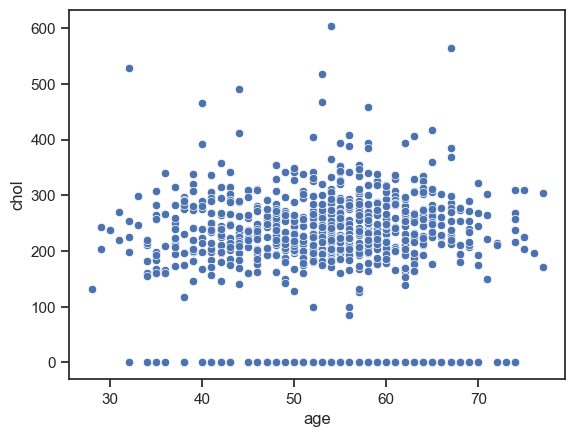

In [38]:
ax1 = sns.scatterplot(x="age", y="chol", data=df)

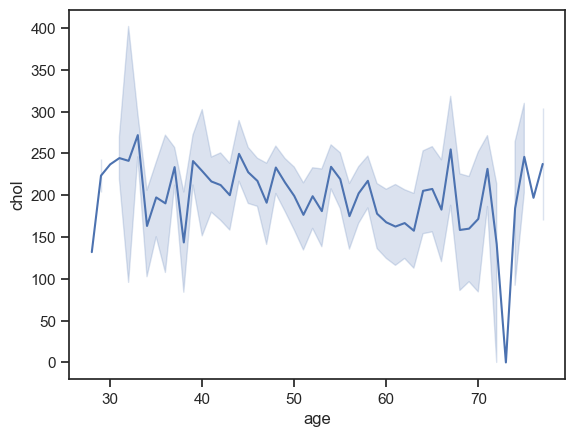

In [39]:
ax = sns.lineplot(x="age", y="chol", data=df)

<Axes: xlabel='sex', ylabel='chol'>

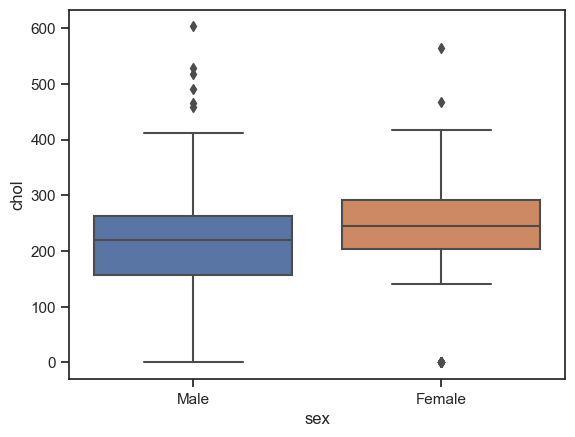

In [42]:
sns.boxplot(x='sex', y='chol', data=df)

<Axes: xlabel='sex', ylabel='chol'>

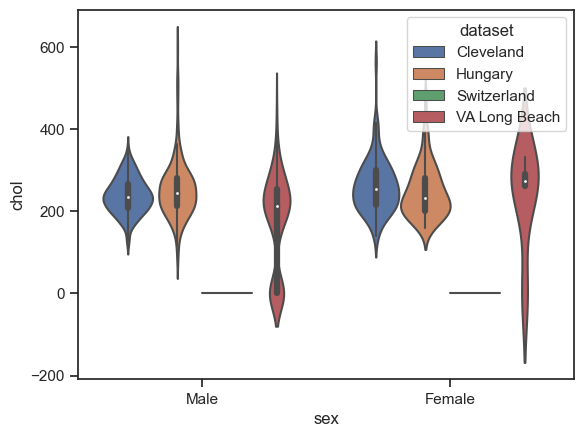

In [44]:
sns.violinplot(x='sex', y='chol', data=df, hue='dataset')

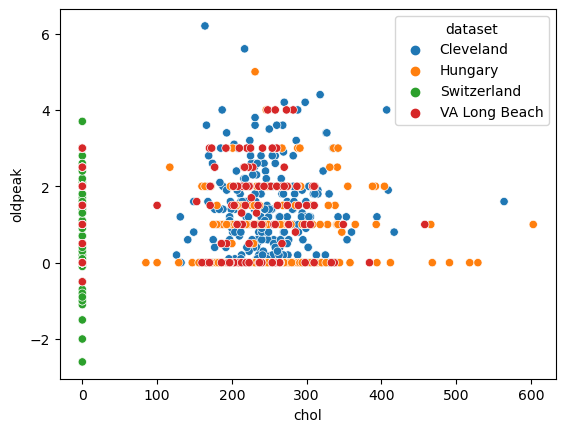

In [6]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax=sns.scatterplot(x='chol', y='oldpeak', hue='dataset', data=data)
plt.show()

In [45]:
import altair as alt
alt.Chart(data).mark_circle().encode(
x='chol:Q',
y='oldpeak:Q',
color='dataset:N',
).interactive()

alt.Chart(...)

In [46]:
alt.Chart(data).mark_circle().encode(
 x='chol:Q',
 y='oldpeak:Q',
 color='dataset:N',
 tooltip=['dataset', 'sex', 'chol', 'oldpeak', 'thalch'],
)

alt.Chart(...)

In [47]:
alt.Chart(data).mark_circle().encode(
 x='chol:Q',
 y='oldpeak:Q',
 color='dataset:N',
 tooltip=['dataset', 'sex', 'chol', 'oldpeak', 'thalch'],
).interactive()

alt.Chart(...)

In [48]:
selected_area = alt.selection_interval()
alt.Chart(data).mark_circle().encode(
 x='chol:Q',
 y='oldpeak:Q',
 color='dataset:N'
).add_selection(
 selected_area
)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Roaming\Python\Python310\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [49]:
selected_area = alt.selection_interval()
alt.Chart(data).mark_circle().encode(
 x='chol:Q',
 y='oldpeak:Q',
 color=alt.condition(selected_area, 'dataset:N', alt.
value('lightgray'))
).add_selection(
 selected_area
)

alt.Chart(...)

In [50]:
chart = alt.Chart(data).mark_circle().encode(
y='chol',
color='dataset:N'
)
chart1 = chart.encode(x='oldpeak')
chart2 = chart.encode(x='thalch')
alt.vconcat(chart1, chart2)

alt.VConcatChart(...)

In [51]:
chart = alt.Chart(data).mark_circle().encode(
y='oldpeak',
color='dataset:N'
)
chart1 = chart.encode(x='chol')
chart2 = chart.encode(x='thalch')
alt.hconcat(chart1, chart2)

alt.HConcatChart(...)

In [52]:
selected_area = alt.selection_interval()
chart = alt.Chart(data).mark_circle().encode(
y='oldpeak',
color=alt.condition(selected_area, 'dataset', alt.
value('lightgray'))
).add_selection(
selected_area
)
chart1 = chart.encode(x='chol')
chart2 = chart.encode(x='thalch')
chart1 | chart2

alt.HConcatChart(...)

In [53]:
input_dropdown = alt.binding_select(options=list(set(data.dataset)))
selected_points = alt.selection_single(fields=['dataset'], bind=input_dropdown, name='Select')
color = alt.condition(selected_points,
alt.Color('dataset:N'),
alt.value('lightgray'))
alt.Chart(data).mark_circle().encode(
x='chol:Q',
y='oldpeak:Q',
color=color,
tooltip='dataset:N'
).add_selection(
selected_points
)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Roaming\Python\Python310\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [54]:
alt.Chart(data).mark_bar().encode(
x='dataset:N',
y='mean(oldpeak):Q',
)

alt.Chart(...)

In [55]:
alt.Chart(data).mark_bar().encode(
x='dataset:N',
y='mean(oldpeak):Q',
).properties(width=400)

alt.Chart(...)

In [56]:
alt.Chart(data).mark_bar().encode(
x='dataset:N',
y='mean(oldpeak):Q',
).properties(width=400).interactive()

alt.Chart(...)

In [57]:
bars = alt.Chart(data).mark_bar().encode(
x='dataset:N',
y='mean(oldpeak):Q',
).properties(width=400)
line = alt.Chart(data).mark_rule(color='firebrick').encode(
y='mean(oldpeak):Q',
size=alt.SizeValue(3)
)
bars | line

alt.HConcatChart(...)

In [58]:
bars = alt.Chart().mark_bar().encode(
x='dataset:N',
y='mean(oldpeak):Q',
).properties(width=400)
line = alt.Chart().mark_rule(color='firebrick').encode(
y='mean(oldpeak):Q',
size=alt.SizeValue(3)
)
alt.layer(bars, line, data=data)

alt.LayerChart(...)

In [59]:
bars = alt.Chart(data).mark_bar().encode(
x='dataset:N',
y='mean(oldpeak):Q',
).properties(width=400)
line = alt.Chart(data).mark_rule(color='firebrick').encode(
y='mean(oldpeak):Q',
size=alt.SizeValue(3)
).interactive()
bars + line

alt.LayerChart(...)

In [60]:
selected_bars = alt.selection(type='interval', encodings=['x'])
bars = alt.Chart(data).mark_bar().encode(
x='dataset:N',
y='mean(oldpeak):Q',
opacity=alt.condition(selected_bars, alt.OpacityValue(1), alt.
OpacityValue(0.7)),
).properties(width=400).add_selection(
selected_bars
)
line = alt.Chart(data).mark_rule(color='firebrick').encode(
y='mean(oldpeak):Q',
size=alt.SizeValue(3)
).transform_filter(
selected_bars
)
bars + line

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Roaming\Python\Python310\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

In [61]:
alt.Chart(data).mark_rect().encode(
alt.X('chol:Q', bin=True),
alt.Y('oldpeak:Q', bin=True),
alt.Color('count()',
scale=alt.Scale(scheme='greenblue'),
legend=alt.Legend(title='Total Countries')
)
)

alt.Chart(...)

In [62]:
alt.Chart(data).mark_bar().encode(
    x='dataset:N',
    y='count():Q',
).properties(width=350)

alt.Chart(...)

In [63]:
alt.Chart(data).mark_rect().encode(
    alt.X('chol:Q', bin=True),
    alt.Y('thalch:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).properties(width=350)

alt.Chart(...)

In [64]:
bars = alt.Chart(data).mark_bar().encode(
    x='Region:N',
    y='count():Q',
).properties(width=350)

heatmap = alt.Chart(data).mark_rect().encode(
    alt.X('chol:Q', bin=True),
    alt.Y('oldpeak:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).properties(width=350)

bars | heatmap

alt.HConcatChart(...)

In [65]:
selected_region = alt.selection(type="single", encodings=['x'])

heatmap = alt.Chart(data).mark_rect().encode(
    alt.X('chol:Q', bin=True),
    alt.Y('oldpeak:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).properties(
    width=350
)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Roaming\Python\Python310\site-packages\altair\vegalite\v5\api.py:469: AltairDeprecationWarning: The types 'single' and 'multi' are now
        combined and should be specified using "selection_point()".
  warnings.warn(


In [66]:
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    selected_region
)

In [67]:
bars = alt.Chart(data).mark_bar().encode(
    x='dataset:N',
    y='count()',
    color=alt.condition(selected_region, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=350
).add_selection(selected_region)

heatmap + circles | bars

alt.HConcatChart(...)

In [97]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10

In [98]:
from bokeh.plotting import figure, show
from bokeh.layouts import layout
from bokeh.io import output_notebook

output_notebook()

hist, edges = np.histogram(data['age'], bins=30)

p = figure(title="Age Distribution", 
           x_axis_label='Age', 
           y_axis_label='Frequency', 
           tools="pan,box_zoom,reset,save")

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], 
       fill_color="navy", line_color="white", alpha=0.7)

show(p)

Loading BokehJS ...

In [108]:
source = ColumnDataSource(data)

p1 = figure(title="Age vs. Max Heart Rate", x_axis_label='Age', y_axis_label='Max Heart Rate',
            tools="pan,box_zoom,reset,save,hover", tooltips=[("Age", "@age"), ("Max Heart Rate", "@thalch")])
p1.circle('age', 'thalch', source=source, color='blue', alpha=0.5)

p2 = figure(title="Cholesterol vs. Resting Blood Pressure", x_axis_label='Cholesterol', y_axis_label='Resting BP',
            tools="pan,box_zoom,reset,save,hover", tooltips=[("Cholesterol", "@chol"), ("Resting BP", "@trestbps")])
p2.circle('chol', 'trestbps', source=source, color='green', alpha=0.5)
grid = gridplot([[p1, p2]])
show(grid)

In [103]:
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform
from bokeh.palettes import Viridis256

correlation_matrix = data.corr().round(2)

correlation_source = ColumnDataSource(correlation_matrix.stack().rename("value").reset_index())

mapper = LinearColorMapper(palette=Viridis256, low=-1, high=1)
p = figure(x_range=list(correlation_matrix.columns), y_range=list(reversed(correlation_matrix.columns)),
           title="Correlation Heatmap",
           toolbar_location=None, tools="", x_axis_location="above")
p.rect(x="level_0", y="level_1", width=1, height=1, source=correlation_source,
       line_color=None, fill_color=transform('value', mapper))
color_bar = ColorBar(color_mapper=mapper, location=(0, 0))
p.add_layout(color_bar, 'right')
p.xaxis.major_label_orientation = 1.0
p.yaxis.major_label_orientation = 1.0
show(p)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3852\310666612.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [105]:
age_mean_blood_pressure = data.groupby('age')['trestbps'].mean().reset_index()
source = ColumnDataSource(age_mean_blood_pressure)
p = figure(title="Average Resting Blood Pressure by Age",
           x_axis_label='Age',
           y_axis_label='Average Resting Blood Pressure',
           plot_width=800,
           plot_height=400)
p.line('age', 'trestbps', source=source, line_width=2, color='navy', legend_label='Resting Blood Pressure')
p.circle('age', 'trestbps', source=source, size=5, color='red', fill_alpha=0.5)

hover = HoverTool()
hover.tooltips = [("Age", "@age"),
                  ("Avg Resting BP", "@trestbps"),]
p.add_tools(hover)
p.legend.location = "top_left"
show(p)

In [109]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(data)

p = figure(title="Bubble Plot of Cholesterol vs. Max Heart Rate",
           x_axis_label='Cholesterol', 
           y_axis_label='Max Heart Rate',
           plot_width=800, 
           plot_height=400)

p.circle('chol', 'thalch', size='thalch', source=source, color='blue', fill_alpha=0.6)

hover = HoverTool()
hover.tooltips = [
    ("Cholesterol", "@chol"),
    ("Max Heart Rate", "@thalch"),
    ("Age", "@age")
]
p.add_tools(hover)

show(p)

Loading BokehJS ...

In [69]:
asymptomatic_cp = df.query("cp=='asymptomatic'")
asymptomatic_cp.head()

id  age     sex    dataset            cp  trestbps   chol    fbs  \
1   2   67    Male  Cleveland  asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland  asymptomatic     120.0  229.0  False   
6   7   62  Female  Cleveland  asymptomatic     140.0  268.0  False   
7   8   57  Female  Cleveland  asymptomatic     120.0  354.0  False   
8   9   63    Male  Cleveland  asymptomatic     130.0  254.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
6  lv hypertrophy   160.0  False      3.6  downsloping  2.0   
7          normal   163.0   True      0.6    upsloping  0.0   
8  lv hypertrophy   147.0  False      1.4         flat  1.0   

                thal  num  
1             normal    2  
2  reversable defect    1  
6             normal    3  
7             normal    0  
8  reversable defect    2

In [73]:
import plotly.express as px

fig = px.choropleth(asymptomatic_cp,
                    locations="dataset",
                    color="thalch",
                    hover_name="thal",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [ ]:
fig = px.choropleth(internet_usage_2016,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", # column by which to color-code
                    hover_name="Country", # column to display in hover information                    color_continuous_scale=px.colors.sequential.Plasma)
                   )
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet usage across the world (% population) - 2016'
)

fig.show()

In [74]:
import plotly.express as px
fig3 = px.bar(df, x = 'cp', y = "chol", animation_frame = 'age', animation_group = 'sex', hover_name = 'dataset')
fig3.show()

In [76]:
fig = px.box(df, x = 'sex', y = 'chol', notched = True)
fig.show()

In [77]:
df3 = df[df['chol'] <300]
df3.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [78]:
fig1 = px.box(df3, x = 'sex', y = 'chol', notched = True)
fig1.show()

In [79]:
doc_w = df[df['chol'] != 0]
doc_w.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  748.000000  748.000000  702.000000  718.000000  703.000000  701.000000   
mean   407.774064   52.883690  132.723647  246.832869  141.095306    0.892297   
std    266.774247    9.496063   17.769742   58.527062   24.870967    1.094191   
min      1.000000   28.000000   92.000000   85.000000   69.000000    0.000000   
25%    187.750000   46.000000  120.000000  210.000000  122.500000    0.000000   
50%    374.500000   54.000000  130.000000  239.500000  142.000000    0.500000   
75%    561.250000   59.000000  140.000000  276.750000  160.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  303.000000  748.000000  
mean     0.663366    0.834225  
std      0.934375    1.102173  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000000    4.000000

In [80]:
fig1 = px.box(doc_w, x = 'sex', y = 'chol', notched = True)
fig1.show()

In [81]:
mean_w = doc_w['chol'].mean()
mean_w

246.83286908077994

In [84]:
w_new = df.replace({'chol': {0:mean_w}})
w_new.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  246.832869  137.545665    0.878788   
std    265.725422    9.424685   19.066070   52.561218   25.926276    1.091226   
min      1.000000   28.000000    0.000000   85.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  216.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  246.832869  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

In [85]:
fig2 = px.box(w_new, x = 'sex', y = 'chol', notched = True)
fig2.show()